<a href="https://colab.research.google.com/github/sugban/REDI-Data-Analytics-/blob/main/Lesson%206/homework_lesson06_ReDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework lesson 06
In this homework we keep on working with the world happiness report dataset. But instead of using only the data from 2015 we are going to use all 5 years (2015-2019) of data. The purpose of this homework is to explore the dataset via visulation techniques and (potentially) some descriptive statistics (e.g. mean, variance, correlation, etc). 


The homework is split into two parts. The first part is about reading all 5 csv's and merging them into one dataset that you can then use for your analysis. This is not necessary/mandatory to do because I provided you with the "clean" dataset (clean_data.csv). However, preprocessing your data is an essential skill that you need to learn. Thus, I recommend to at least try this exercise.

The second part is about the exploration of the dataset. This is a relatively free task but it's definitely something that you encounter in real life. You should already have some ideas from this week's class. You can get additional ideas by considering that the data is recorded from 2015 until 2019. For example, are there countries where the happiness score increase/decreased a lot between 2015 and 2019? Could you identify countries where the happiness score is "very" volatile? 

Please share a pdf with your results with me (Ben) before next weeks class. You can look online on how to convert a Jupyter notebook to pdf. 

I'm looking forward to your results! 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

%matplotlib inline

In [ ]:
df_2015=pd.read_csv('data/2015.csv')
df_2015.rename(columns = {'Country':'Country or region'}, inplace = True)
df_2015.drop(['Standard Error','Dystopia Residual'],axis=1,inplace=True)
df_2015['Year']=2015

df_2016=pd.read_csv('data/2016.csv')
df_2016.rename(columns = {'Country':'Country or region'}, inplace = True)
df_2016.drop(['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'], axis=1,inplace=True)
df_2016['Year']=2016

df_2017=pd.read_csv('data/2017.csv')
df_2017.rename(columns = {'Country':'Country or region','Happiness.Rank':'Happiness Rank','Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Health..Life.Expectancy.':'Health (Life Expectancy)', 'Trust..Government.Corruption.':'Trust (Government Corruption)'}, inplace = True)
df_2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'], axis=1,inplace=True)
df_2017['Year']=2017

df_2018=pd.read_csv('data/2018.csv')
df_2018.rename(columns = {'Overall rank':'Happiness Rank','Score':'Happiness Score','GDP per capita':'Economy (GDP per Capita)','Healthy life expectancy':'Health (Life Expectancy)','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)
df_2018['Year']=2018

df_2019=pd.read_csv('data/2019.csv')
df_2019.rename(columns = {'Overall rank':'Happiness Rank','Score':'Happiness Score','GDP per capita':'Economy (GDP per Capita)','Healthy life expectancy':'Health (Life Expectancy)','Freedom to make life choices':'Freedom','Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)
df_2019['Year']=2019

In [ ]:
df_2017.columns

Index(['Country or region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Year'],
      dtype='object')

In [ ]:
df = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019], ignore_index=True)
df.drop('Region',axis=1,inplace=True)
print(df)

            Country or region  Happiness Rank  Happiness Score  \
0                 Switzerland               1            7.587   
1                     Iceland               2            7.561   
2                     Denmark               3            7.527   
3                      Norway               4            7.522   
4                      Canada               5            7.427   
..                        ...             ...              ...   
777                    Rwanda             152            3.334   
778                  Tanzania             153            3.231   
779               Afghanistan             154            3.203   
780  Central African Republic             155            3.083   
781               South Sudan             156            2.853   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143  0.66557   
1                     1.30232  1.40223               

In [ ]:
df_CR=df_2015[['Country or region','Region']]
df_CR

,Country or region,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


In [ ]:
df=df.merge(df_CR, on='Country or region')
df

,Country or region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Social support,Region
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015,NaN,Western Europe
1,Switzerland,2,7.509,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2016,NaN,Western Europe
2,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2017,NaN,Western Europe
3,Switzerland,5,7.487,1.420000,NaN,0.927000,0.660000,0.357000,0.256000,2018,1.549,Western Europe
4,Switzerland,6,7.480,1.452000,NaN,1.052000,0.572000,0.343000,0.263000,2019,1.526,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
752,Togo,158,2.839,0.208680,0.139950,0.284430,0.364530,0.107310,0.166810,2015,NaN,Sub-Saharan Africa
753,Togo,155,3.303,0.281230,0.000000,0.248110,0.346780,0.115870,0.175170,2016,NaN,Sub-Saharan Africa
754,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.095665,0.196896,2017,NaN,Sub-Saharan Africa
755,Togo,139,3.999,0.259000,NaN,0.253000,0.434000,0.101000,0.158000,2018,0.474,Sub-Saharan Africa


In [ ]:
df.drop(['Social support','Family'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 756
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country or region              757 non-null    object 
 1   Happiness Rank                 757 non-null    int64  
 2   Happiness Score                757 non-null    float64
 3   Economy (GDP per Capita)       757 non-null    float64
 4   Health (Life Expectancy)       757 non-null    float64
 5   Freedom                        757 non-null    float64
 6   Trust (Government Corruption)  756 non-null    float64
 7   Generosity                     757 non-null    float64
 8   Year                           757 non-null    int64  
 9   Region                         757 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 65.1+ KB


In [ ]:
df_score=df[['Country or region','Region','Happiness Score','Year']]
df_score.sort_values(by=['Year','Happiness Score'],ascending=False)

,Country or region,Region,Happiness Score,Year
29,Finland,Western Europe,7.769,2019
14,Denmark,Western Europe,7.600,2019
19,Norway,Western Europe,7.554,2019
9,Iceland,Western Europe,7.494,2019
34,Netherlands,Western Europe,7.488,2019
...,...,...,...,...
732,Rwanda,Sub-Saharan Africa,3.465,2015
737,Benin,Sub-Saharan Africa,3.340,2015
742,Syria,Middle East and Northern Africa,3.006,2015
747,Burundi,Sub-Saharan Africa,2.905,2015


In [ ]:
top19=df_score[df_score.Year==2019].head(10)
top18=df_score[df_score.Year==2018].head(10)
top17=df_score[df_score.Year==2017].head(10)
top16=df_score[df_score.Year==2016].head(10)
top15=df_score[df_score.Year==2015].head(10)

In [ ]:
bottom19=df_score[df_score.Year==2019].tail(10)
bottom18=df_score[df_score.Year==2018].tail(10)
bottom17=df_score[df_score.Year==2017].tail(10)
bottom16=df_score[df_score.Year==2016].tail(10)
bottom15=df_score[df_score.Year==2015].tail(10)

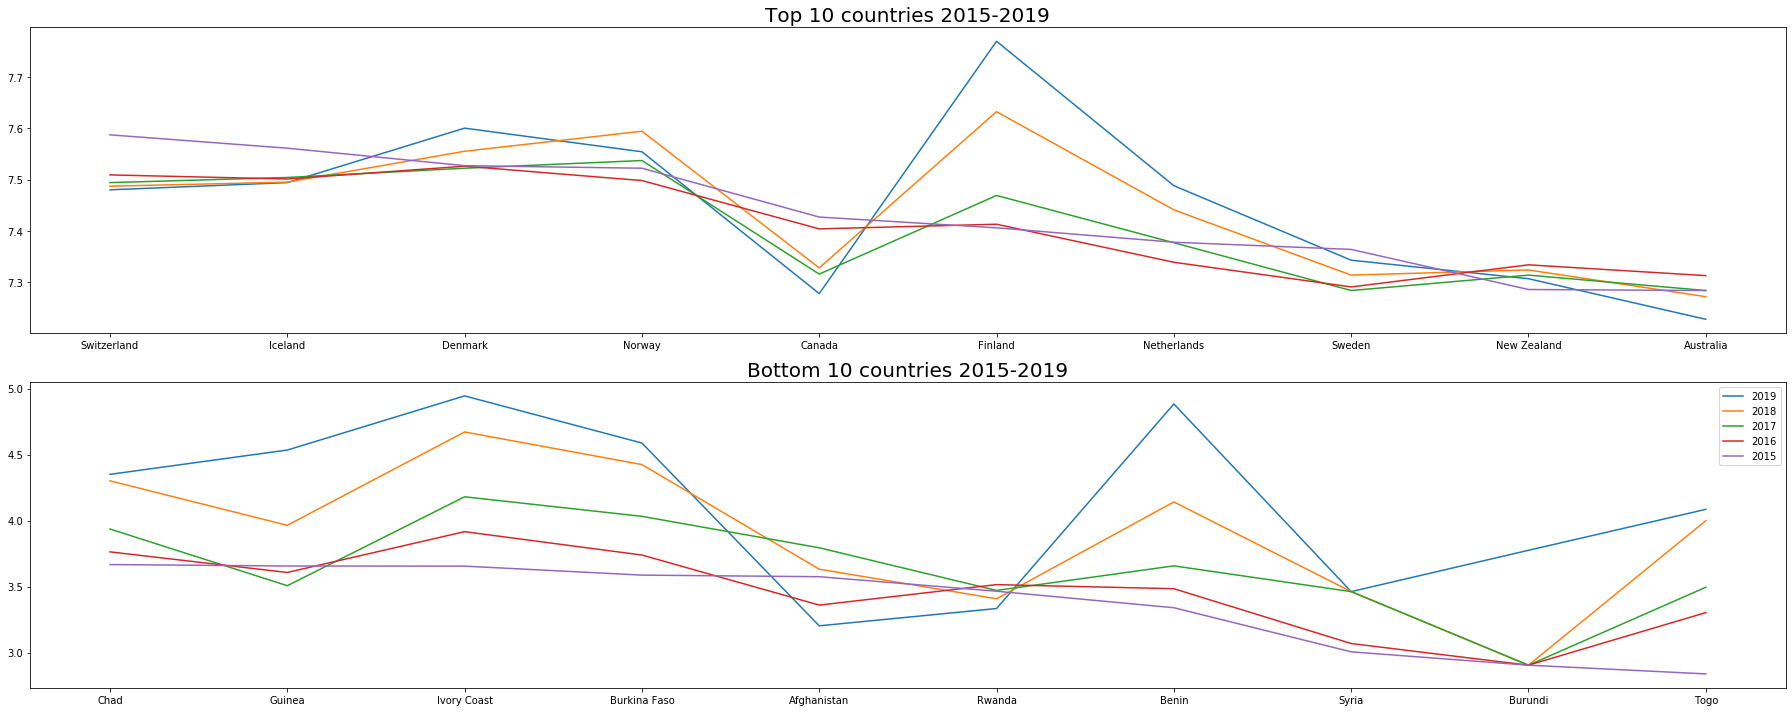

In [ ]:
fig,ax=plt.subplots(nrows=2, figsize=(25, 10))

ax[0].plot(top19['Country or region'], top19['Happiness Score'],label='2019')
ax[0].plot(top18['Country or region'], top18['Happiness Score'],label='2018')
ax[0].plot(top17['Country or region'], top17['Happiness Score'],label='2017')
ax[0].plot(top16['Country or region'], top16['Happiness Score'],label='2016')
ax[0].plot(top15['Country or region'], top15['Happiness Score'],label='2015')

ax[0].set_title('Top 10 countries 2015-2019',fontsize=20)

ax[1].plot(bottom19['Country or region'], bottom19['Happiness Score'],label='2019')
ax[1].plot(bottom18['Country or region'], bottom18['Happiness Score'],label='2018')
ax[1].plot(bottom17['Country or region'], bottom17['Happiness Score'],label='2017')
ax[1].plot(bottom16['Country or region'], bottom16['Happiness Score'],label='2016')
ax[1].plot(bottom15['Country or region'], bottom15['Happiness Score'],label='2015')

ax[1].set_title('Bottom 10 countries 2015-2019',fontsize=20)

fig.tight_layout()
plt.legend()
plt.show()

In [ ]:
dfV=df[df['Country or region']=='Finland']
dfV

,Country or region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
25,Finland,6,7.406,1.290250,0.889110,0.641690,0.413720,0.233510,2015,Western Europe
26,Finland,5,7.413,1.405980,0.810910,0.571040,0.410040,0.254920,2016,Western Europe
27,Finland,5,7.469,1.443572,0.809158,0.617951,0.382612,0.245483,2017,Western Europe
28,Finland,1,7.632,1.305000,0.874000,0.681000,0.393000,0.202000,2018,Western Europe
29,Finland,1,7.769,1.340000,0.986000,0.596000,0.393000,0.153000,2019,Western Europe


In [ ]:
var_min=dfV[dfV['Happiness Score']==dfV['Happiness Score'].min()]
var_min

,Country or region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
25,Finland,6,7.406,1.29025,0.88911,0.64169,0.41372,0.23351,2015,Western Europe


In [ ]:
var=statistics.variance(dfV['Happiness Score'])
var

0.025001704724124815

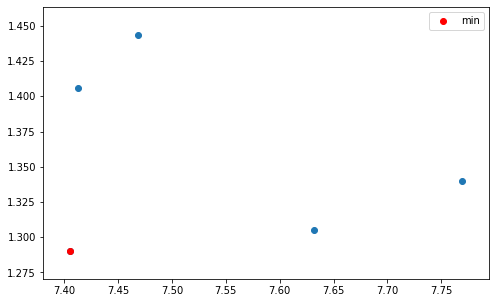

In [ ]:
plt.figure(figsize=(8,5)) 

plt.scatter(dfV['Happiness Score'],dfV['Economy (GDP per Capita)'])
plt.scatter(var_min['Happiness Score'],var_min['Economy (GDP per Capita)'],color='red',label='min')


plt.legend()
plt.show()

In [ ]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,757.000000,757.000000,757.000000,757.000000,757.000000,756.000000,757.000000,757.000000
mean,78.384412,5.388122,0.921814,0.617248,0.410317,0.124820,0.218527,2016.974901
std,45.317328,1.130053,0.403176,0.245764,0.152520,0.106029,0.123094,1.421920
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,39.000000,4.508000,0.619000,0.454000,0.309000,0.053888,0.129762,2016.000000
50%,78.000000,5.324000,0.986000,0.652130,0.430540,0.089141,0.201800,2017.000000
75%,118.000000,6.218000,1.241420,0.809250,0.531000,0.155313,0.280000,2018.000000
max,158.000000,7.769000,2.096000,1.141000,0.724000,0.551910,0.838075,2019.000000


In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.

For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right. In cases where one tail is long but the other tail is fat, skewness does not obey a simple rule. For example, a zero value means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, but can also be true for an asymmetric distribution where one tail is long and thin, and the other is short but fat.

skewness = 0 : normally distributed.<br>
skewness > 0 : more weight in the left tail of the distribution.<br>
skewness < 0 : more weight in the right tail of the distribution

In [ ]:
df.skew()

Happiness Rank                   0.004068
Happiness Score                  0.041073
Economy (GDP per Capita)        -0.309197
Health (Life Expectancy)        -0.535884
Freedom                         -0.501311
Trust (Government Corruption)    1.543579
Generosity                       1.047880
Year                             0.019424
dtype: float64

In [ ]:
df_col=df[['Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]

 variance is the squared deviation of a variable from its mean. Basically, it measures the spread of random data in a set from its mean or median value. A low value for variance indicates that the data are clustered together and are not spread apart widely, whereas a high value would indicate that the data in the given set are much more spread apart from the average value. 

In [ ]:
statistics.variance(df['Happiness Score'])

1.2770205393896672

In [ ]:
statistics.stdev(df['Happiness Score'])

1.1300533347544564

In [ ]:
statistics.mean(df['Happiness Score'])

5.388121532702225

In [ ]:
corr=df_col.corr(method='pearson')
corr

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.797339,0.747745,0.550108,0.412705,0.139592
Economy (GDP per Capita),0.797339,1.000000,0.779341,0.353443,0.341236,-0.005723
Health (Life Expectancy),0.747745,0.779341,1.000000,0.355520,0.274275,0.013498
Freedom,0.550108,0.353443,0.355520,1.000000,0.465758,0.302158
Trust (Government Corruption),0.412705,0.341236,0.274275,0.465758,1.000000,0.310106
Generosity,0.139592,-0.005723,0.013498,0.302158,0.310106,1.000000


<Figure size 360x360 with 0 Axes>

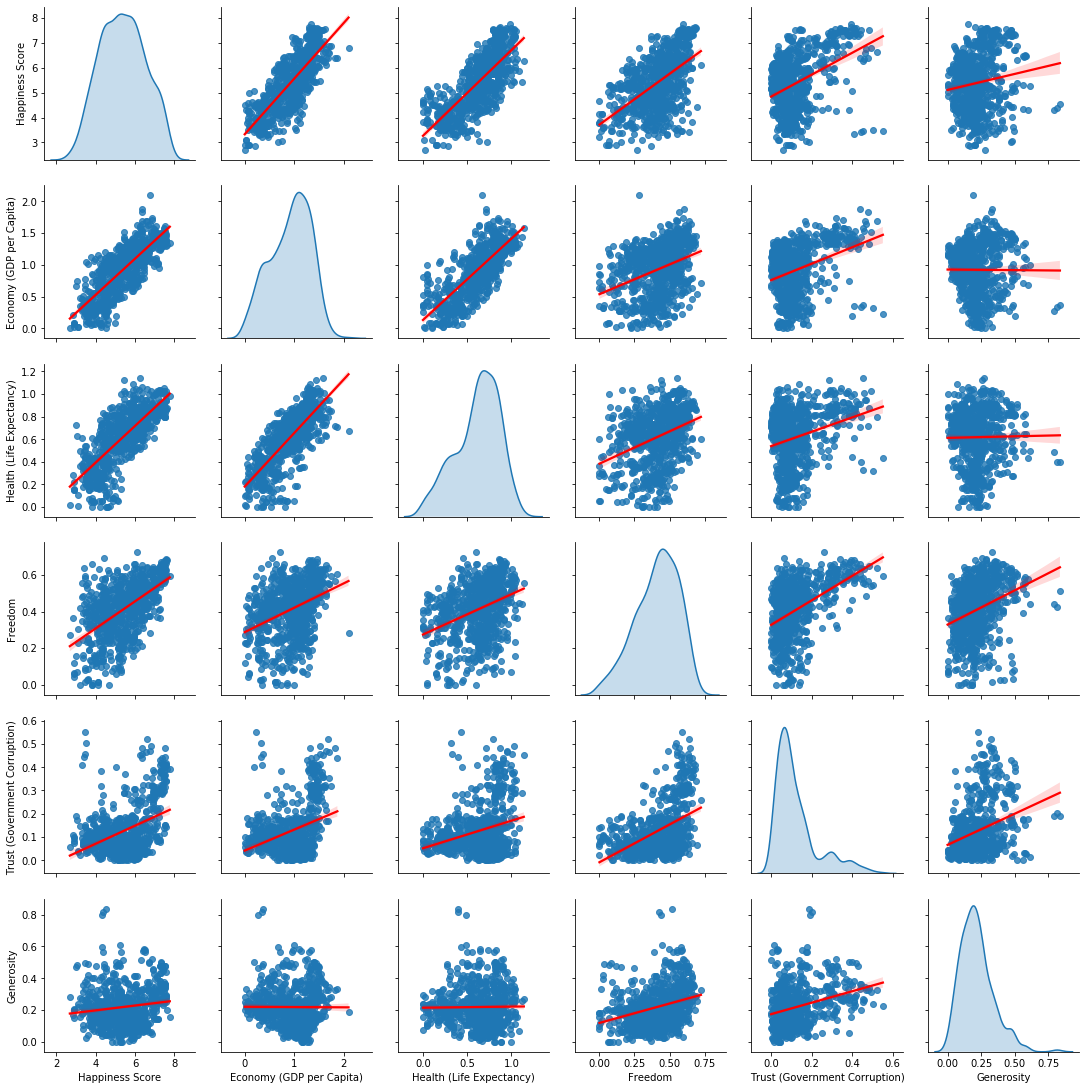

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(df_col,diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}})

Text(0, 0.5, 'GDP Per Capita')

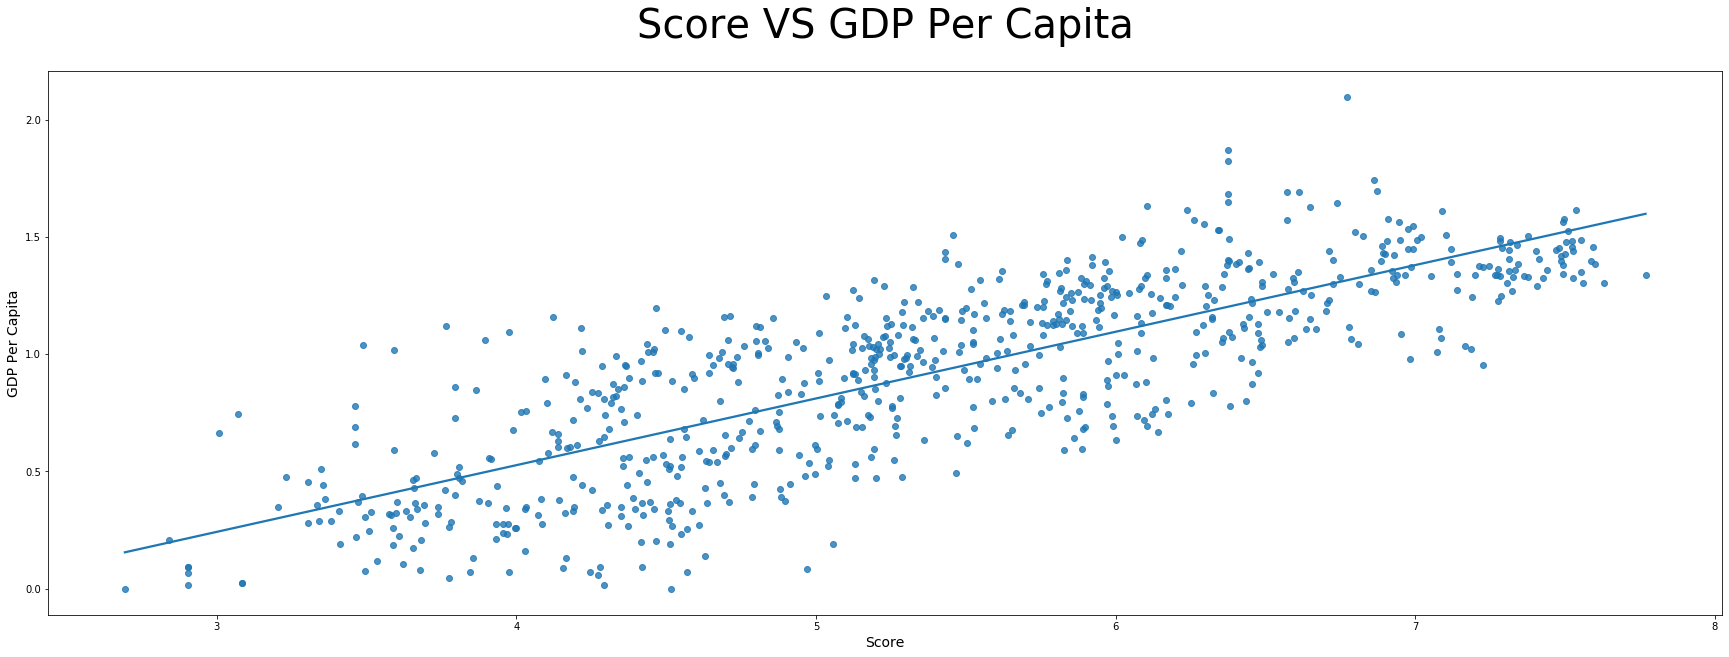

In [ ]:
plt.figure( figsize=(30,10))
sns.regplot(x = 'Happiness Score',y = 'Economy (GDP per Capita)',ci = None,data = df)

plt.title('Score VS GDP Per Capita', fontsize=40, y=1.05)
plt.xlabel('Score', fontsize=14)
plt.ylabel('GDP Per Capita', fontsize=14)

Text(0, 0.5, 'Healthy life Expectancy')

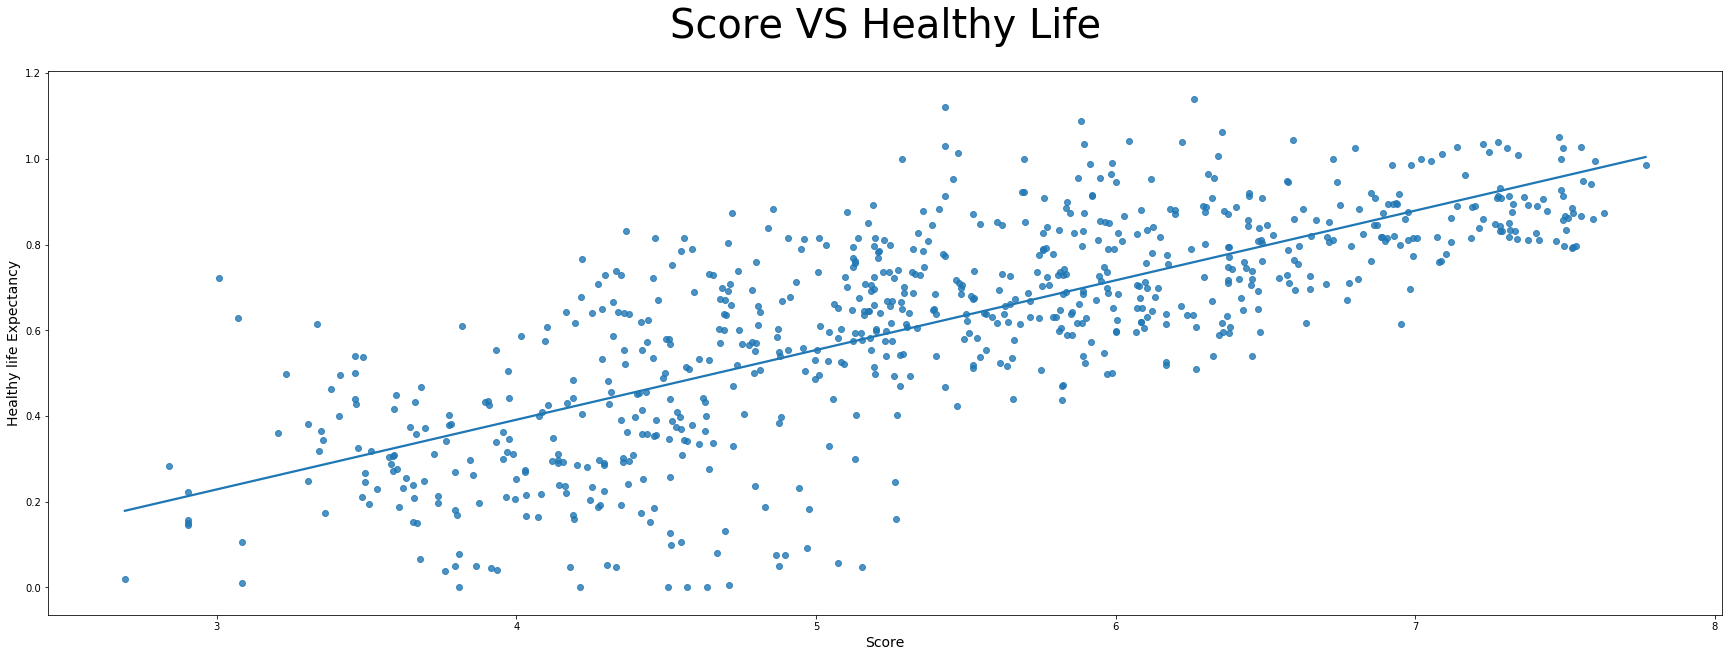

In [ ]:
plt.figure( figsize=(30,10))
sns.regplot(x = 'Happiness Score',y = 'Health (Life Expectancy)',ci = None,data = df)

plt.title('Score VS Healthy Life', fontsize=40, y=1.05)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Healthy life Expectancy', fontsize=14)

Text(0, 0.5, 'Trust on Government')

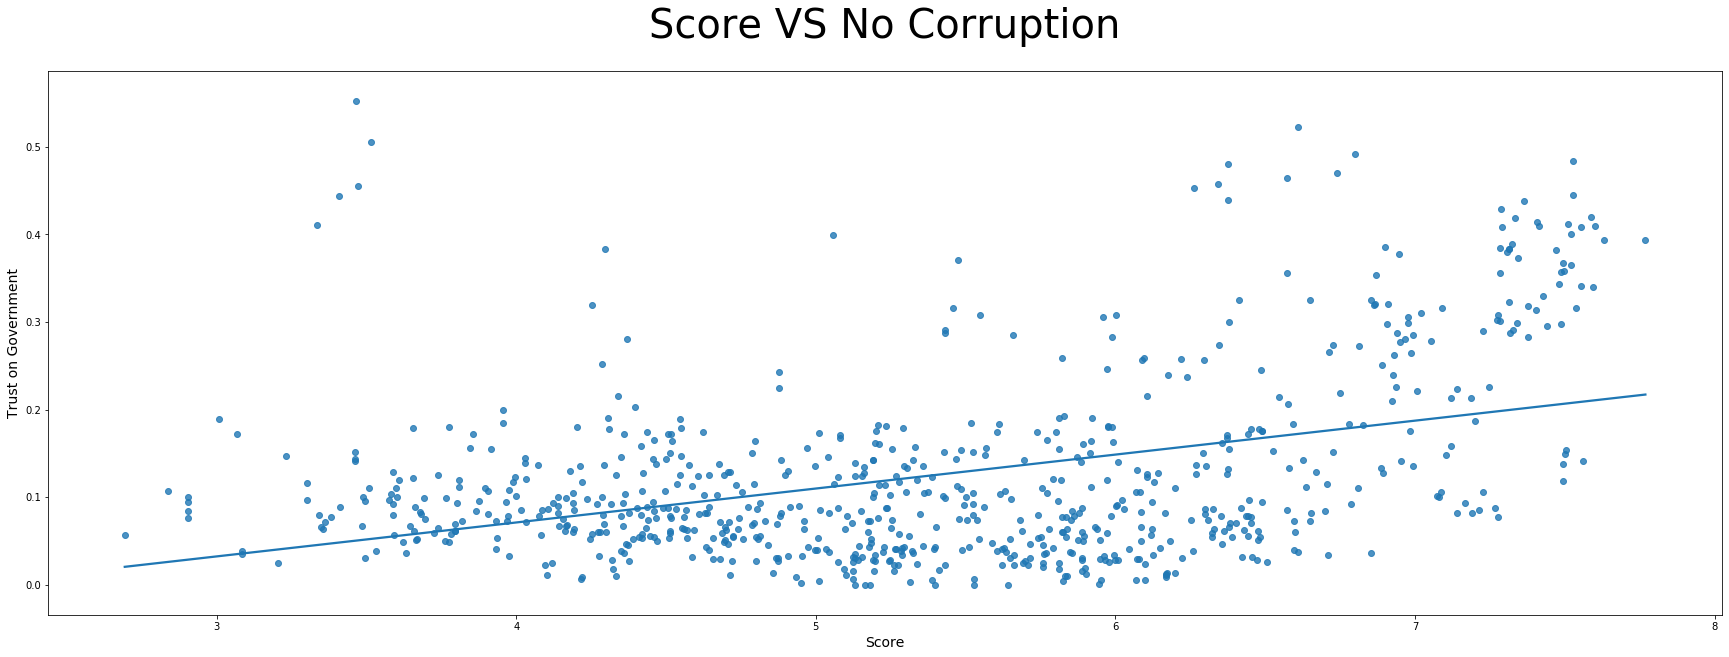

In [ ]:
plt.figure( figsize=(30,10))
sns.regplot(x = 'Happiness Score',y = 'Trust (Government Corruption)',ci = None,data = df)

plt.title('Score VS No Corruption', fontsize=40, y=1.05)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Trust on Government', fontsize=14)

Text(0, 0.5, 'Freedom')

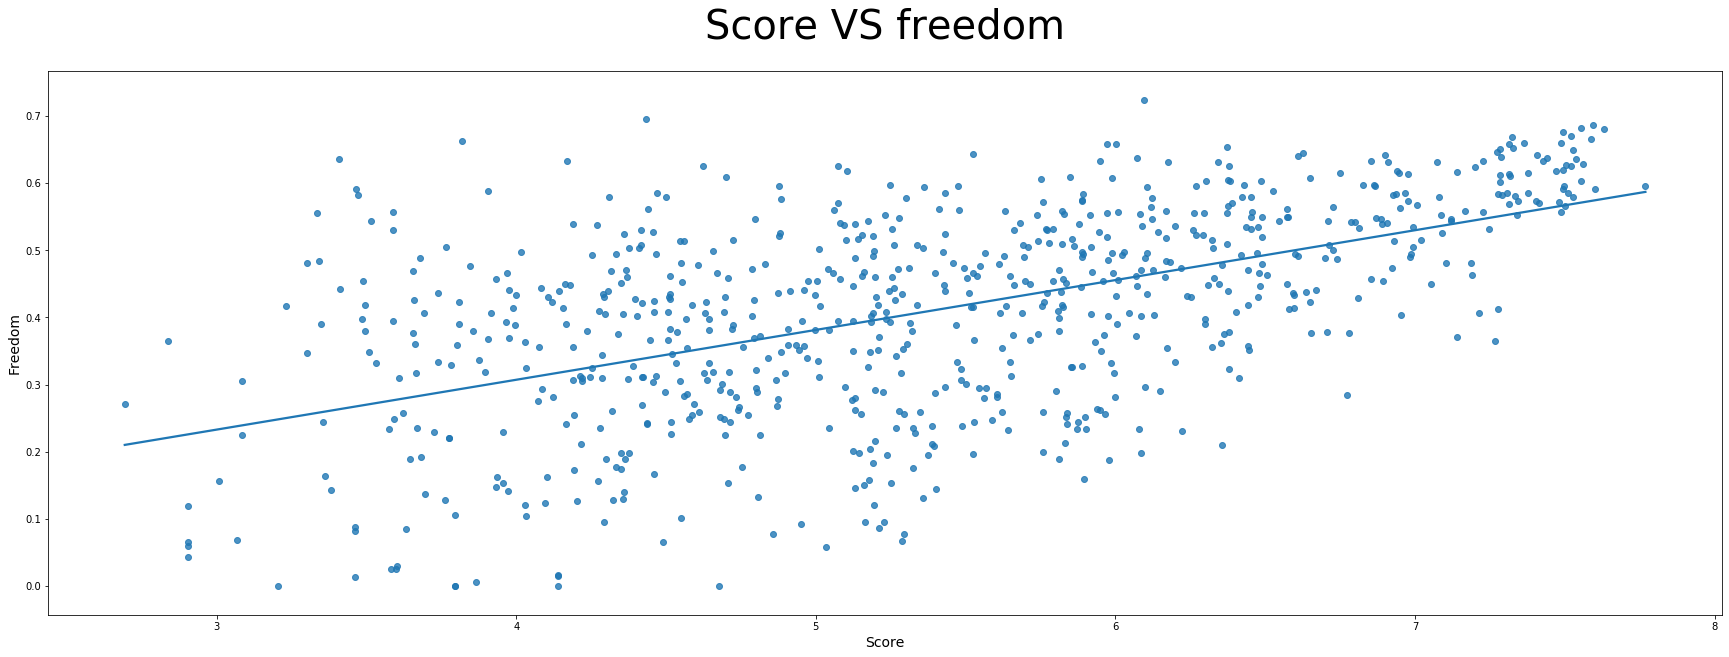

In [ ]:
plt.figure( figsize=(30,10))
sns.regplot(x = 'Happiness Score',y = 'Freedom',ci = None,data = df)

plt.title('Score VS freedom', fontsize=40, y=1.05)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Freedom', fontsize=14)

In [ ]:
df_region=df_score.groupby(['Year','Region'])['Happiness Score'].mean().reset_index().sort_values(['Year','Happiness Score'])
df_region

,Year,Region,Happiness Score
8,2015,Sub-Saharan Africa,4.202800
7,2015,Southern Asia,4.580857
6,2015,Southeastern Asia,5.317444
1,2015,Central and Eastern Europe,5.332931
4,2015,Middle East and Northern Africa,5.406900
2,2015,Eastern Asia,5.626167
3,2015,Latin America and Caribbean,6.144682
9,2015,Western Europe,6.689619
5,2015,North America,7.273000
0,2015,Australia and New Zealand,7.285000


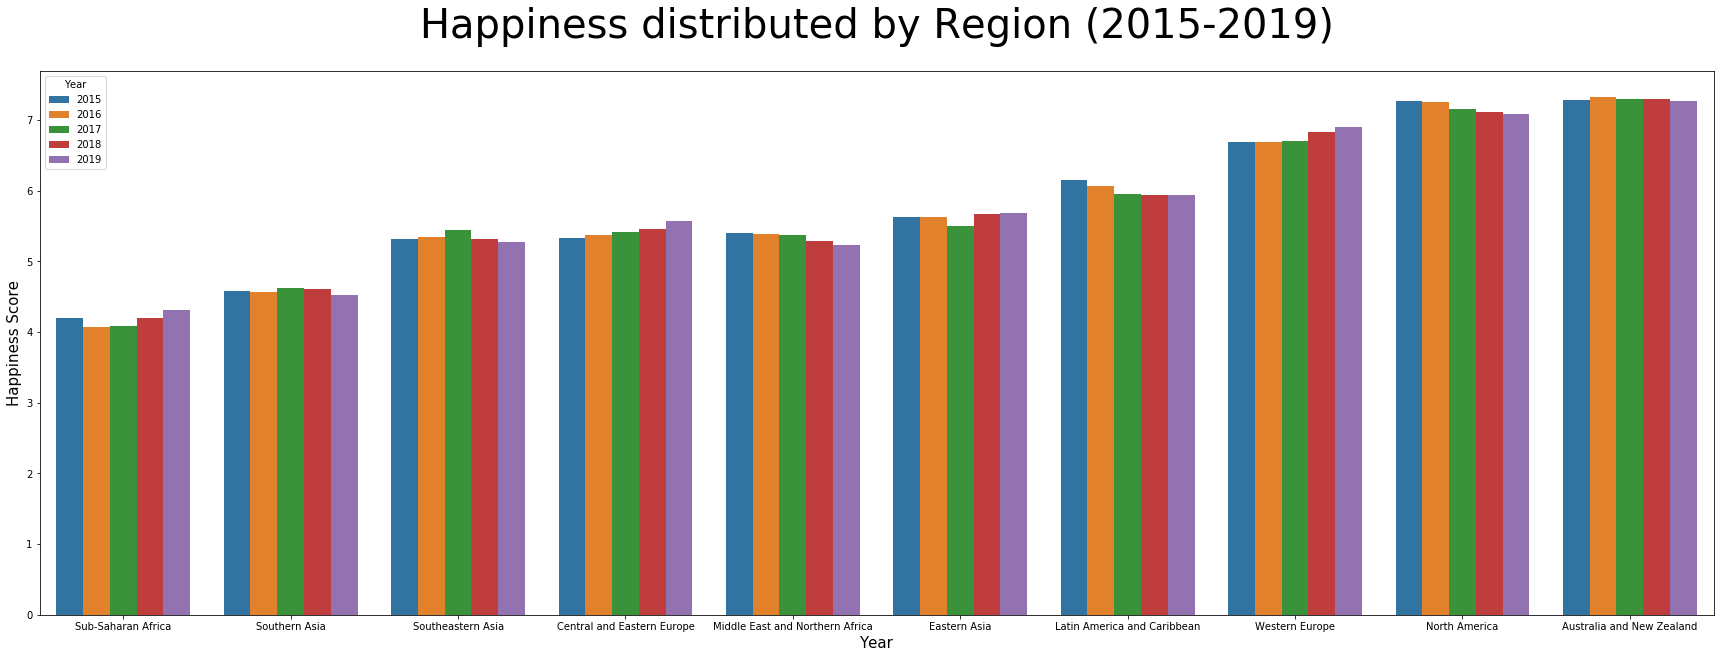

In [ ]:
plt.figure( figsize=(30,10))
sns.barplot(x='Region',y='Happiness Score',hue='Year',data=df_region, ci=None)

plt.title('Happiness distributed by Region (2015-2019)', fontsize=40, y=1.05)
plt.ylabel('Happiness Score', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()